<a href="https://colab.research.google.com/github/rammeshulam/ml-exercise/blob/main/Regression_models_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression models

This exercise is focused on regression models. It includes a warm-up exercise with a dummy dataset to practice the basics of regression algorithms and metrics. Following that, it includes a second exercise to explore a bike-sharing dataset and apply different regression models for prediction.
Interesting links:

Classifiers

* [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
* [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor)


Metrics
* [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
* [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
* [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

# 0 Boiler plate

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, f1_score

import requests
from io import BytesIO
from zipfile import ZipFile

import matplotlib.pyplot as plt
import seaborn as sns


# 1 Warm up exercise

The exercise is based a dummy data set. The exercise aims to practice the basics of regression algorithms with different metrics.

First, lets create a dataset which shows the relation between temperature (X) and daily sales of of Ice Cream cones (y):

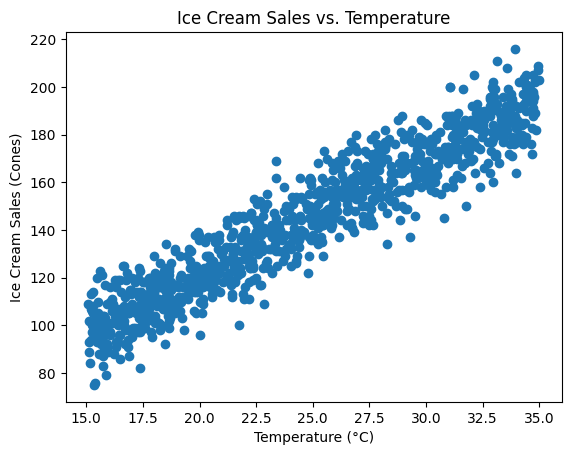

In [ ]:
np.random.seed(42)
temperature = np.random.uniform(15, 35, 1000)  # Temperature in Celsius
ice_cream_sales = np.round(20 + 5 * temperature + np.random.normal(0, 10, 1000))  # Sales in units

df = pd.DataFrame({'Temperature': temperature, 'Sales': ice_cream_sales})

# Visualize
plt.scatter(df['Temperature'], df['Sales'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (Cones)')
plt.title('Ice Cream Sales vs. Temperature')
plt.show()

## 1.1 Regression model
Suppose we'd like to predict daily sales of Ice-cream cones.

1.1.1 Split data to train-set (70%) amd test-set (30%).

1.1.2 Train a regression model and print Mean Squared Error (MSE) on the test set.


In [ ]:
df.head()

,Temperature,Sales
0,22.490802,134.0
1,34.014286,177.0
2,29.639879,172.0
3,26.973170,161.0
4,18.120373,116.0


## 1.2 Logistic-Regression model
Suppose we'd like to predict whether tomorrow is going to be a high-sales day, which will require us to hire help to our ice-cream stand.

A a day is defined as 'HighSales' day, if it is in the 75tile of historical sales.

1.2.1 Create a new target variable 'HighSales' (1 if sales > 75tile, 0 otherwise)

1.2.2 create a new target vSplit data to train-set (70%) amd test-set (30%).

1.2.3 Train a logistic-regression model and print accuracy, F1-score and confusion matrix on the test set.


# 2 Bike sharing prediction

## 2.1 Load data

Dataset Features
* record_id
* date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* year (0: 2011, 1:2012)
* month ( 1 to 12)
* hour (0 to 23)
* holiday : weather day is holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weather_situation :
 * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 *2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 *3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* humidity: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

(source: [ics.uci.edu](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset))

In [ ]:
#Load data and improve column readability:

url = 'https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip'
response = requests.get(url)

with ZipFile(BytesIO(response.content)) as zip_file:
    df_raw = pd.read_csv(zip_file.open('hour.csv'))

df_raw = df_raw.rename(columns={"instant": "record_id", "dteday": "date", "yr": "year", "mnth": "month", "hr": "hour", "weathersit": "weather_situation", "hum": "humidity", "cnt": "count"})

df_raw.head().T

,0,1,2,3,4
record_id,1,2,3,4,5
date,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
season,1,1,1,1,1
year,0,0,0,0,0
month,1,1,1,1,1
hour,0,1,2,3,4
holiday,0,0,0,0,0
weekday,6,6,6,6,6
workingday,0,0,0,0,0
weather_situation,1,1,1,1,1


## 2.2 Exploratory Data Analysis (EDA)

### 2.2.1 Initial steps

**Clean and prepare the data for exploration and modeling:** handle duplicates, missing values, ensure the correct type (numerical/categorical), drop columns which are not useful (including date)

### 2.2.2 Identify patterns and relationships

**Explore the data:** what are the peak hours during workdays/non-working days? do rentals increase during holidays? are the answers the same for registered and casual users? What is the impact of weather on rentals? months? seasons? etc'. Is there correlation between pairs of numerical feature? a feature and target?

If two features are highly correlated, consider removing one of them.

EDA Insights:
...

## 2.3 Build a regression model
1. Since 'casual' and 'registered' are not known in advance, exclude them from from the feature set.
2. Create a training-test sets with ratio of 80%-20%
3. Train and calculate RMSE performace of: Linear Regression, Decision Tree Regressor, XGBoost Regressor and Random Forest Regressor (use default settings). Which algorithm yields the best performance?
4. use CV grid-search to tune the best performing model.

Bonus:
1. plot a historgram of predicted values of Linear Regression model. Are all predictions positive?
2. To ensure positive predictions, log-transform the target i.e., train the model to predict np.log1p(y) instead of y (but do not forget to transform the prediction back before comparing it to y). Does the performance improve?
3. plot two plots to visualize the error residual per prediction, with and without log-transformation. The x-axis of the plot is predictions, the y-axis is Error residual (y-y_pred). where is the variance of error smaller?

